# Stock Price Prediction using LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from math import sqrt

## 1. Data Collection

In [2]:
# Fetching stock data from Yahoo Finance
data = pd.read_csv(r"C:\Users\surface\Downloads\archive (1)\AAPL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [3]:
data.shape

(10409, 7)

## 2. Data Preprocessing

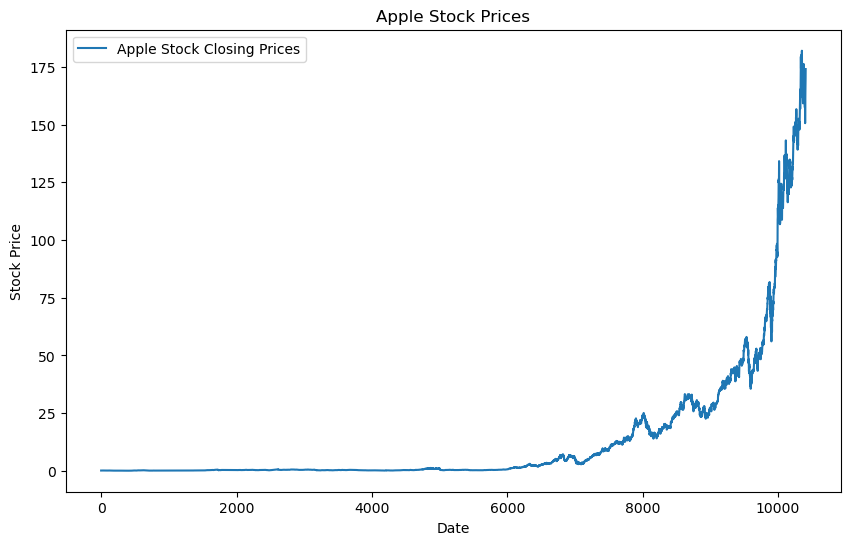

In [4]:
# Visualize the closing prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Apple Stock Closing Prices')
plt.title('Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [5]:
# Selecting the 'Close' prices for the model
df = data[['Close']]

# Normalize the dataset to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Split the data into training and test sets (80% training, 20% testing)
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:training_data_len]
test_data = scaled_data[training_data_len - 60:]

# Create the training dataset
X_train, y_train = [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create the testing dataset
X_test, y_test = [], df[training_data_len:].values
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## 3. Building the LSTM Model

In [ ]:
# Building the LSTM model
model = Sequential()

# Adding the first LSTM layer
model.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

c:\Users\surface\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 60)         │        14,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        22,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,131 (145.04 KB)

 Trainable params: 37,131 (145.04 KB)

 Non-trainable params: 0 (0.00 B)

LSTM Layer: The first layer is an LSTM (Long Short-Term Memory) layer.

units=50: The number of neurons (or units) in this LSTM layer. Each unit corresponds to a hidden state in the LSTM. Using 50 units means the LSTM will learn 50 different patterns from the sequence data.

return_sequences=True: This ensures that the LSTM layer returns the entire sequence (i.e., the hidden state output at each time step). This is necessary when stacking LSTM layers because the next LSTM layer expects a sequence as input.

input_shape=(X_train.shape[1], 1): This defines the shape of the input data. Here:

X_train.shape[1] is the number of time steps (e.g., 60 previous days of stock prices).
1 represents the number of features (e.g., the stock price).

The shape (60, 1) means the LSTM will receive a sequence of 60 time steps, where each time step has 1 feature (the stock price).

Dropout Layer: model.add(Dropout(0.2))

Dropout is a regularization technique to prevent overfitting. It randomly "drops out" 20% of the units (neurons) during training, which helps make the model more robust by not relying too heavily on any specific neurons.

Second LSTM Layer:

units=50: Similar to the first LSTM layer, this one also has 50 units.

return_sequences=False: This time, we set return_sequences=False, meaning the second LSTM layer will only return the final hidden state output (not the whole sequence). This is because the second LSTM layer is followed by a Dense layer (which requires only the final output, not the entire sequence).

Dropout Layer: Another dropout layer is added to reduce overfitting, with 20% of the units being randomly dropped during training.

Dense Layer (Output Layer):

The Dense(1) layer is a fully connected (dense) layer with 1 unit. Since we are predicting a single value (the stock price for the next time step), the output layer has only 1 neuron.
This layer receives the output from the last LSTM layer and provides the final predicted value.

## 4. Training the Model

In [7]:
# Training the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - loss: 1.5478e-04 - val_loss: 5348.9746
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 1.0877e-05 - val_loss: 5355.5552
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 1.1024e-05 - val_loss: 5350.8130
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 8.7293e-06 - val_loss: 5355.7988
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 1.1158e-05 - val_loss: 5353.6387
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 7.9600e-06 - val_loss: 5352.0439
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 9.7794e-06 - val_loss: 5351.3530
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 9.2843e-06 - val_loss: 5353.6699
Epoch 9/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 8.2652e-06 - val_loss: 5354.8423
Epoch 10/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 9.4008e-06 - val_loss: 5353.2627
Epoch 11/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms

## 5. Model Evaluation and Predictions

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


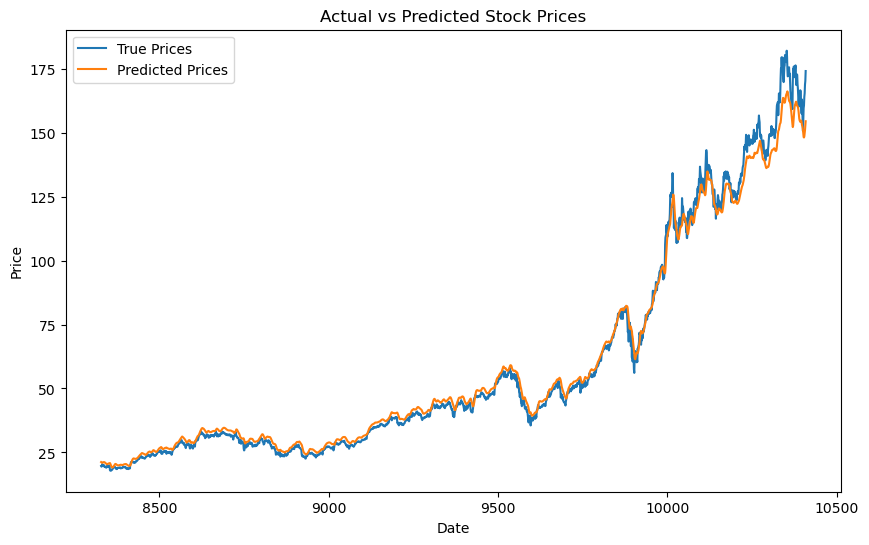

Root Mean Squared Error: 3.8318185136997807


In [8]:
# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot predictions vs actual
plt.figure(figsize=(10,6))
plt.plot(df[training_data_len:], label='True Prices')
plt.plot(pd.DataFrame(predicted_prices, index=df[training_data_len:].index), label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, predicted_prices))
print(f'Root Mean Squared Error: {rmse}')

## 6. Future Price Prediction

In [9]:
# Use the last 60 days to predict future stock prices
last_60_days = test_data[-60:]
X_predict = last_60_days.reshape(1, last_60_days.shape[0], 1)
predicted_price = model.predict(X_predict)
predicted_price = scaler.inverse_transform(predicted_price)
print(f'Predicted Stock Price for the next day: {predicted_price[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Stock Price for the next day: 156.46762084960938
